### CruiseMaps with Data

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

#using xarray for bathymetry data read
import xarray as xa
import pandas as pd

extent=[-179.5, -145, 50, 74]

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(server_url) 
bathy_sub = bathy.sel(latitude=slice(extent[3],extent[2]),longitude=slice(extent[0],extent[1]))

#bathy_sub.topo.plot(cmap=cmocean.cm.gray)

In [2]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [3]:
path = ''
data = pd.read_csv(path + 'bottomtmp.csv')
#data = pd.read_csv(path + 'nearsfc.csv')

#loc['latitude'] = loc['lat']+loc['latdm']/60
#loc['longitude'] = -1 * loc['lon']+loc['londm']/60

In [4]:
data

,Pressure [dbar],c0mS/cm,c1mS/cm,flECO-AFL,sbeox0V,t090C,t190C,timeS,sbeox1V,par,...,sbeox0PS,sbeox1ML/L,sbox1Mm/Kg,sbeox1PS,nbin,flag,profile_id,latitude,longitude,time
0,156.0,32.265886,32.266863,0.0942,1.7630,5.5269,5.5273,400.234,2.7481,0.20168,...,68.123,4.6528,202.518,65.731,7.0,False,dy2012ctd001,54.442167,-165.281667,2020-09-02 11:42:13
1,66.0,29.921418,29.923567,0.1429,1.9651,3.4917,3.4930,239.652,3.0994,0.20624,...,78.378,5.7149,248.827,76.529,20.0,False,dy2012ctd002,57.861333,-168.880500,2020-09-03 21:45:20
2,64.0,30.007386,30.008687,0.1612,1.9548,3.5537,3.5541,271.137,3.0831,0.20329,...,77.833,5.6645,246.626,75.990,42.0,False,dy2012ctd003,57.652500,-169.018500,2020-09-03 23:48:03
3,66.0,29.385069,29.386494,0.2271,2.0334,3.0043,3.0048,189.980,3.2068,0.20359,...,82.145,6.0634,264.023,80.137,36.0,False,dy2012ctd004,57.767333,-168.464500,2020-09-04 02:25:36
4,66.0,29.389785,29.391316,0.2262,2.0437,3.0246,3.0250,186.225,3.2226,0.20341,...,82.657,6.0904,265.199,80.525,31.0,False,dy2012ctd005,58.063167,-168.722500,2020-09-04 05:04:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,47.0,29.701801,29.700646,0.9055,2.0227,3.9748,3.9731,127.390,3.1886,0.44503,...,81.279,5.8639,255.469,79.064,18.0,False,dy2012ctd069,58.462333,-167.591500,2020-09-20 00:50:20
71,63.0,29.864551,29.867521,2.4821,1.7940,3.5954,3.5959,214.868,2.8167,0.20172,...,69.227,5.0324,219.139,67.483,40.0,False,dy2012ctd070,57.019333,-164.219333,2020-09-20 14:04:22
72,67.0,29.863806,29.867218,1.2535,1.8373,3.5647,3.5657,149.926,2.8812,0.20173,...,71.533,5.1921,226.087,69.586,15.0,False,dy2012ctd071,56.871667,-164.044833,2020-09-20 16:06:18
73,67.0,32.488578,32.488964,0.3828,1.9719,6.6215,6.6182,152.394,3.1065,0.20226,...,78.061,5.2691,229.511,75.982,38.0,False,dy2012ctd072,54.856667,-158.999333,2020-09-22 16:32:03


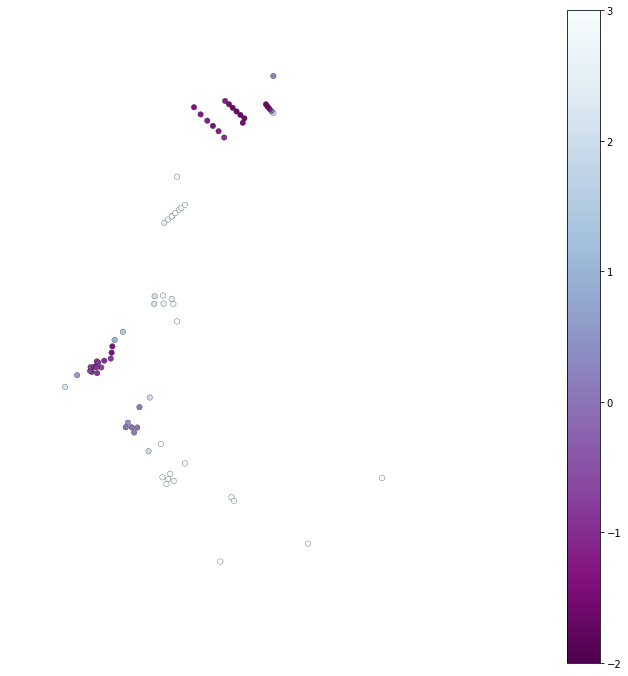

In [5]:
projection=ccrs.LambertConformal(central_longitude=-170.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

"""
ax.pcolormesh(bathy_sub.longitude, bathy_sub.latitude, 
              bathy_sub.topo, cmap=cmocean.cm.gray,
              vmin=-3000,vmax=100,
              transform=transformation)

"""
c = ax.scatter(data.longitude, data.latitude, s=30, vmin=-2, vmax=3,
                               edgecolor='k', linewidths=.25,
                               c=data.t090C, cmap='BuPu_r',
                               transform=transformation)
"""

c = ax.scatter(data.longitude, data.latitude, s=15,
                               c=data.sal00, cmap=cmocean.cm.haline,
                               transform=transformation)
"""
plt.colorbar(c)
#ax.add_feature(land_50m)
#ax.coastlines(resolution='10m')
ax.set_extent(extent)
        
fig.patch.set_visible(False)
ax.axis('off')
fig.savefig('DY2012_Bottom_Transparent_pointsonly.png',dpi=300, transparent=True)